# Non-Linear Regression

### Loading the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

### Loading the data

In [2]:
data = pd.read_csv("ChinaGDP.csv")
x_data = data["Year"].values
y_data = data["Value"].values

In [3]:
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1 * (x - Beta_2)))
    return y

In [4]:
beta_1 = 0.10
beta_2 = 1990.0
y_predict = sigmoid(x_data, beta_1, beta_2)

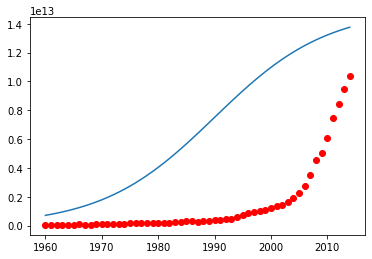

In [5]:
plt.plot(x_data, y_predict * 15000000000000)
plt.plot(x_data, y_data, "ro")
plt.show()

In [6]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

In [7]:
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print("BETA-1 : {}, BETA-2 : {}".format(popt[0], popt[1]))

BETA-1 : 690.4517092123388, BETA-2 : 0.9972071272529931


In [8]:
X = np.linspace(1960, 2015, 55)
X = X/max(X)
Y = sigmoid(X, *popt)

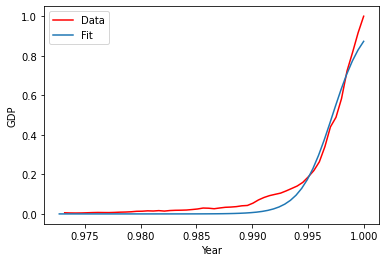

In [9]:
plt.plot(xdata, ydata, "r", label="Data")
plt.plot(X, Y, label = "Fit")
plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.show()

In [10]:
msk = np.random.rand(len(data)) < 0.8
x_train = xdata[msk]
y_train = ydata[msk]
x_test = xdata[~msk]
y_test = ydata[~msk]
popt, pcov = curve_fit(sigmoid, x_train, y_train)
y_predict = sigmoid(x_test, *popt)
print("Mean absolute error : {0:.2f}".format(np.mean(np.absolute(y_predict - y_test ))))
print("Residual sum of squares (MSE) : {0:.2f}".format(np.mean((y_predict - y_test) ** 2)))
print("R2-score : {0:.2f}".format(r2_score(y_predict, y_test)))

Mean absolute error : 0.03
Residual sum of squares (MSE) : 0.00
R2-score : 0.69
